In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LassoCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV

## 범주형 변수 원핫인코딩

In [2]:
df=pd.read_csv('dataset7.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,본분교,국공사립,학위과정 유형,주야간,전공계열,학교유형,학교소재권역,학교소재지역,졸업년,A3.현직장_대분류,...,"현/전_인사체계,승진제도_만족도비교",현/전_일의사회적평판_만족도비교,"현/전_일의자율성,권한_만족도비교",현/전_일자리사회적평판_만족도비교,"현/전_적성,흥미일치_만족도비교","현/전_직무관련교육,훈련",현/전_전반만족도비교,현/전_업무전반만족도비교,근무기간,"거주지,사업체_시도일치"
0,1,3,3,0,1,1,1,1,2019-02-01,9.0,...,0.500,0.500,0.625,0.500,0.500,0.500,0.500,0.500,0.014256,0
1,1,3,3,0,1,1,1,1,2019-02-01,7.0,...,0.750,0.750,0.750,0.625,0.625,0.625,0.500,0.375,0.014256,0
2,1,3,3,1,1,1,1,1,2019-02-01,9.0,...,0.375,0.375,0.375,0.375,0.625,0.250,0.125,0.250,0.011854,0
3,1,3,3,0,1,1,2,8,2019-02-01,17.0,...,0.750,0.750,0.750,0.750,0.750,0.750,0.500,0.875,0.007128,0
4,1,1,5,1,1,1,2,8,2019-02-01,13.0,...,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.030759,0


In [3]:
#범주형/수치형 컬럼 구분

categorical_features= ['본분교', '국공사립', '학위과정 유형', '주야간', '전공계열', '학교유형', '학교소재권역', '학교소재지역', '졸업년',
                       'A3.현직장_대분류', 'A5.현기업체_종사자수', 'A5현사업체_종사자수', 'A13.현직장_법정퇴직금,퇴직연금', 'A13.현직장_유급휴가',
                       'A13.현직장_육아휴직', 'A13.현직장_시간외수당', 'A13.현직장_상여금', 'A13.현직장_유급주휴', 'A13.현직장_산전후휴가', 'A14.현직장_정규직여부',
                       'A41.현직장_국민연금가입여부', 'A41.현직장_특수직역연금가입여부', 'A41.현직장_건강보험가입여부', 'A41.현직장_고용보험가입여부',
                       'A41.현직장_산재보험가입여부', 'A42.현직장_노동조합존재여부', 'A50.현직장_일자리제의경험', 'A76.현직장_첫직장여부', 'G1.졸업후학교여부',
                       'L1.대학의직업교육,훈련경험', 'L12.직업교육,훈련희망여부', 'P1.혼인여부', 'P3.부양자녀유무', 'P12.부모님자산규모', 'R1.전년도소득액_근로·사업 소득여부',
                       'R1.전년도소득액_육아휴직급여여부', 'R1.전년도소득액_산전후휴가급여여부','R1.전년도소득액_ 실업급여여부', 'R1.전년도소득액_그 외사회보험여부',
                       'R1.전년도소득액_공적이전소득여부', 'R1.전년도소득액_경제적지원여부', 'R1.전년도소득액_금융,부동산소득여부',
                       'R1.전년도소득액_금융,부동산소득대출소득여부', 'R1.전년도소득액_기타소득여부', 'R3.가족경제적지원하는지여부', 'R4.생활비충당방식','거주지,사업체_시도일치']

numeric_features = [col for col in df.columns if col not in categorical_features]
numeric_features.remove('이직준비여부')

In [4]:
#train/test set split

X=df.drop(columns=['이직준비여부'])
y=df['이직준비여부']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# 수치형 변수 정규화(전처리과정에서 완료), 범주형 변수 원-핫 인코딩

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

## 로지스틱회귀 모델학습

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# L1-정규화 로지스틱 회귀 모델
logistic = LogisticRegression(penalty='l1', solver='saga', random_state=42)

# 파이프라인 설정
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', logistic)
])

param_distributions = {
    'logistic__C': [0.01, 0.1, 1, 10, 100]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions, n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)  # 모델 학습

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score: {:.3f}".format(random_search.best_score_))

# Fitting 3 folds for each of 5 candidates, totalling 15 fits
# Best parameters: {'logistic__C': 0.1}
# Best cross-validation score: 0.756

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'logistic__C': 0.1}
Best cross-validation score: 0.756


In [7]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
#Accuracy: 0.75

Accuracy: 0.75


In [8]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
#Precision: 0.77
#Recall: 0.91

Precision: 0.77
Recall: 0.91


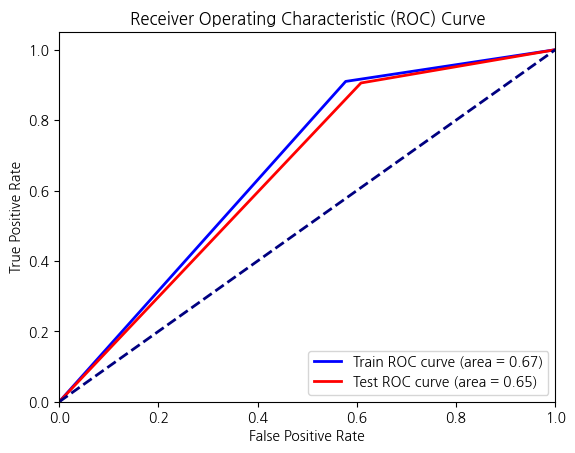

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 최적의 모델 접근
best_model = random_search.best_estimator_

# 훈련 세트 예측
train_preds = best_model.predict(X_train)#.as_data_frame()
train_actual =y_train

# 검증 세트 예측
test_preds = best_model.predict(X_test)#.as_data_frame()
test_actual = y_test

# ROC 곡선 및 AUC 계산 (훈련 세트)

fpr_train, tpr_train, thresholds = roc_curve(y_train, train_preds)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC 곡선 및 AUC 계산 (검증 세트)
fpr_test, tpr_test, thresholds = roc_curve(test_actual, test_preds)
roc_auc_test = auc(fpr_test, tpr_test)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 변수 중요도 확인

In [10]:
# 열 이름 처리 함수
def process_column_name(name):
    if name.startswith('num__'):
        return name[5:]
    elif name.startswith('cat__'):
        return name[5:].rsplit('_', 1)[0]

In [11]:
# 최적의 모델에서 계수 추출
best_model = random_search.best_estimator_
logistic_coefs = best_model.named_steps['logistic'].coef_[0]

# 전처리된 데이터의 변수 이름 가져오기
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# 특성과 계수를 데이터프레임으로 변환
feature_importances = pd.DataFrame({
    'column': feature_names,
    'coef': logistic_coefs
})

#컬럼명 조정
feature_importances['colname'] = feature_importances['column'].apply(process_column_name)
feature_importances= feature_importances.drop(columns=['column'])

#계수 절대값으로 정렬
feature_importances = feature_importances.assign(abs_coef=feature_importances['coef'].abs())
feature_importances = feature_importances.sort_values(by='abs_coef', ascending=False).reset_index(drop=True)
feature_importances.drop('abs_coef', axis=1, inplace=True)

#중복제거
feature_importances = feature_importances.drop_duplicates(subset='colname')

feature_importances

,coef,colname
0,2.240114,A33-1.현직장전반만족도
1,0.968418,"A34.현직장_교육,일수준일치정도"
2,0.768734,A14.현직장_정규직여부
3,0.699682,A50.현직장_일자리제의경험
4,0.628418,Q9.한달간감정_부정
...,...,...
189,0.000000,근무기간
190,0.000000,본분교
192,0.000000,국공사립
197,0.000000,학위과정 유형


In [14]:
#계수가 0이 아닌 features만 남기기 -> selected_features
selected_features=feature_importances[feature_importances['coef']!=0].reset_index(drop=True)
selected_features

,coef,colname
0,2.240114,A33-1.현직장전반만족도
1,0.968418,"A34.현직장_교육,일수준일치정도"
2,0.768734,A14.현직장_정규직여부
3,0.699682,A50.현직장_일자리제의경험
4,0.628418,Q9.한달간감정_부정
5,0.574474,"A33.현직장만족도_인사체계,승진제도"
6,0.536205,A33.현직장만족도_개인발전가능성
7,0.350828,A36.현직장_전공일치정도
8,0.321325,A41.현직장_고용보험가입여부
9,0.296434,"L12.직업교육,훈련희망여부"


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

plt.rcParams['font.family'] = 'NanumGothic'

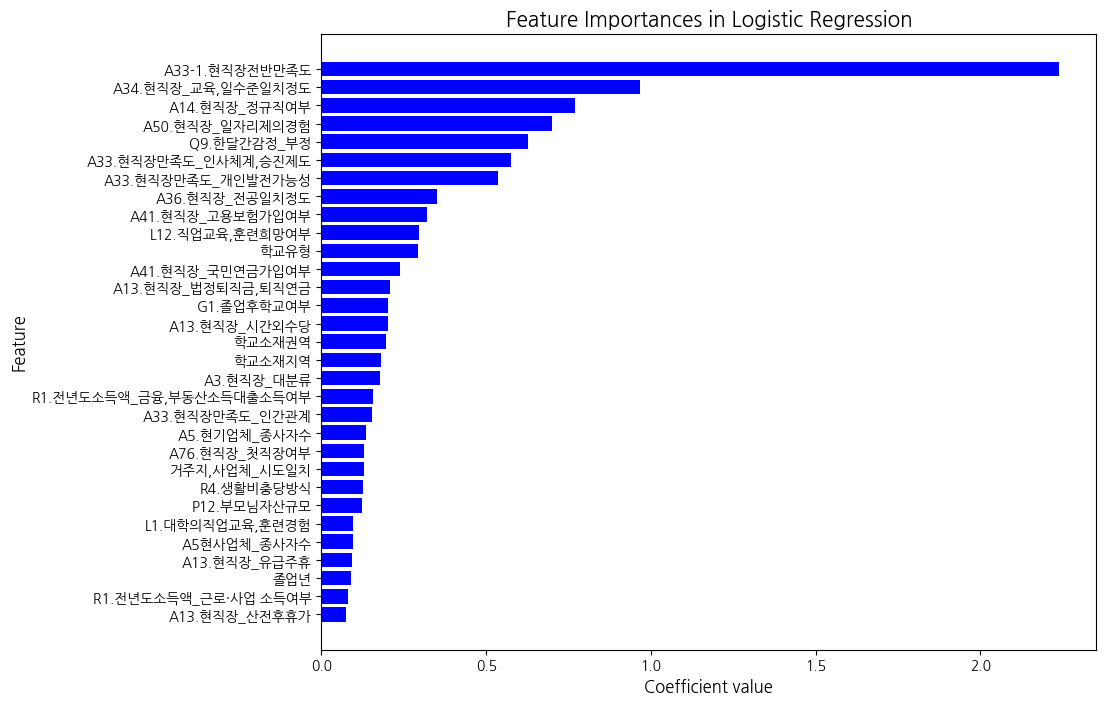

In [17]:
#계수 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
plt.title('Feature Importances in Logistic Regression',fontsize=15)
plt.barh(selected_features['colname'].loc[:30],abs(selected_features['coef'].loc[:30]), color='b', align='center')
#plt.yticks()
plt.xlabel('Coefficient value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.show()